# 02 Analyze data from Github

## Import modules

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import networkx as nx
import pandas as pd
import seaborn
# Import the platform_analysis libraries
import platform_analysis.github_analysis as github
import platform_analysis.sna as sna

In [2]:
pd.set_option('display.max_columns', None) # Display all the columns

# Set seaborn style
seaborn.set_style("whitegrid")
seaborn.set_context("poster")

# Configure font
matplotlib.rcParams['font.sans-serif'] = "Fira Sans"
matplotlib.rcParams['font.family'] = "sans-serif"

In [3]:
first_person_color = '#fa824c'
second_person_color = '#00bdbf'
third_person_color = '#f3f1e9'

## Load data locally

In [4]:
time_data = pd.read_csv("data/time_data.csv", encoding='utf-8')
data = pd.read_csv("data/data.csv", encoding='utf-8')
user_data = pd.read_csv("data/user_data.csv", encoding='utf-8')

## All users - Time visualization

In [5]:
# Group interactions by type
global_stats = sna.type_stats(data=time_data, focus="global")

In [6]:
global_stats

Unnamed: 0               2021-09-02 11:31:012021-09-02 12:05:162021-03-...
commit                                                                1165
issue comment                                                          426
issue assignation                                                       64
merged pull request                                                     44
pull request comment                                                    10
fork                                                                    24
comment mention                                                          3
pull request assignee                                                    5
commit comment                                                           2
repository creation                                                      1
dtype: object

In [7]:
g2 = global_stats.drop("Unnamed: 0")

In [8]:
g3 = g2.astype(int)

In [9]:
g3

commit                   1165
issue comment             426
issue assignation          64
merged pull request        44
pull request comment       10
fork                       24
comment mention             3
pull request assignee       5
commit comment              2
repository creation         1
dtype: int64

In [10]:
g3["total"] = g3.sum()

In [11]:
g3

commit                   1165
issue comment             426
issue assignation          64
merged pull request        44
pull request comment       10
fork                       24
comment mention             3
pull request assignee       5
commit comment              2
repository creation         1
total                    1744
dtype: int64

In [12]:
user_stats=user_data.groupby("Unnamed: 0").sum()

In [13]:
user_stats.drop(columns=['Unnamed: 1'], axis=1, inplace=True)

In [14]:
user_stats

,commit,issue comment,issue assignation,merged pull request,pull request comment,fork,comment mention,pull request assignee,commit comment,repository creation
Unnamed: 0,,,,,,,,,,
ARKopp,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aldo23,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AnanseGroup,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Fablabimpact,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Georgy5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
vierarb,0.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
viktorsmari,245.0,69.0,5.0,12.0,2.0,1.0,2.0,0.0,2.0,0.0
waagsociety,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


([], [])

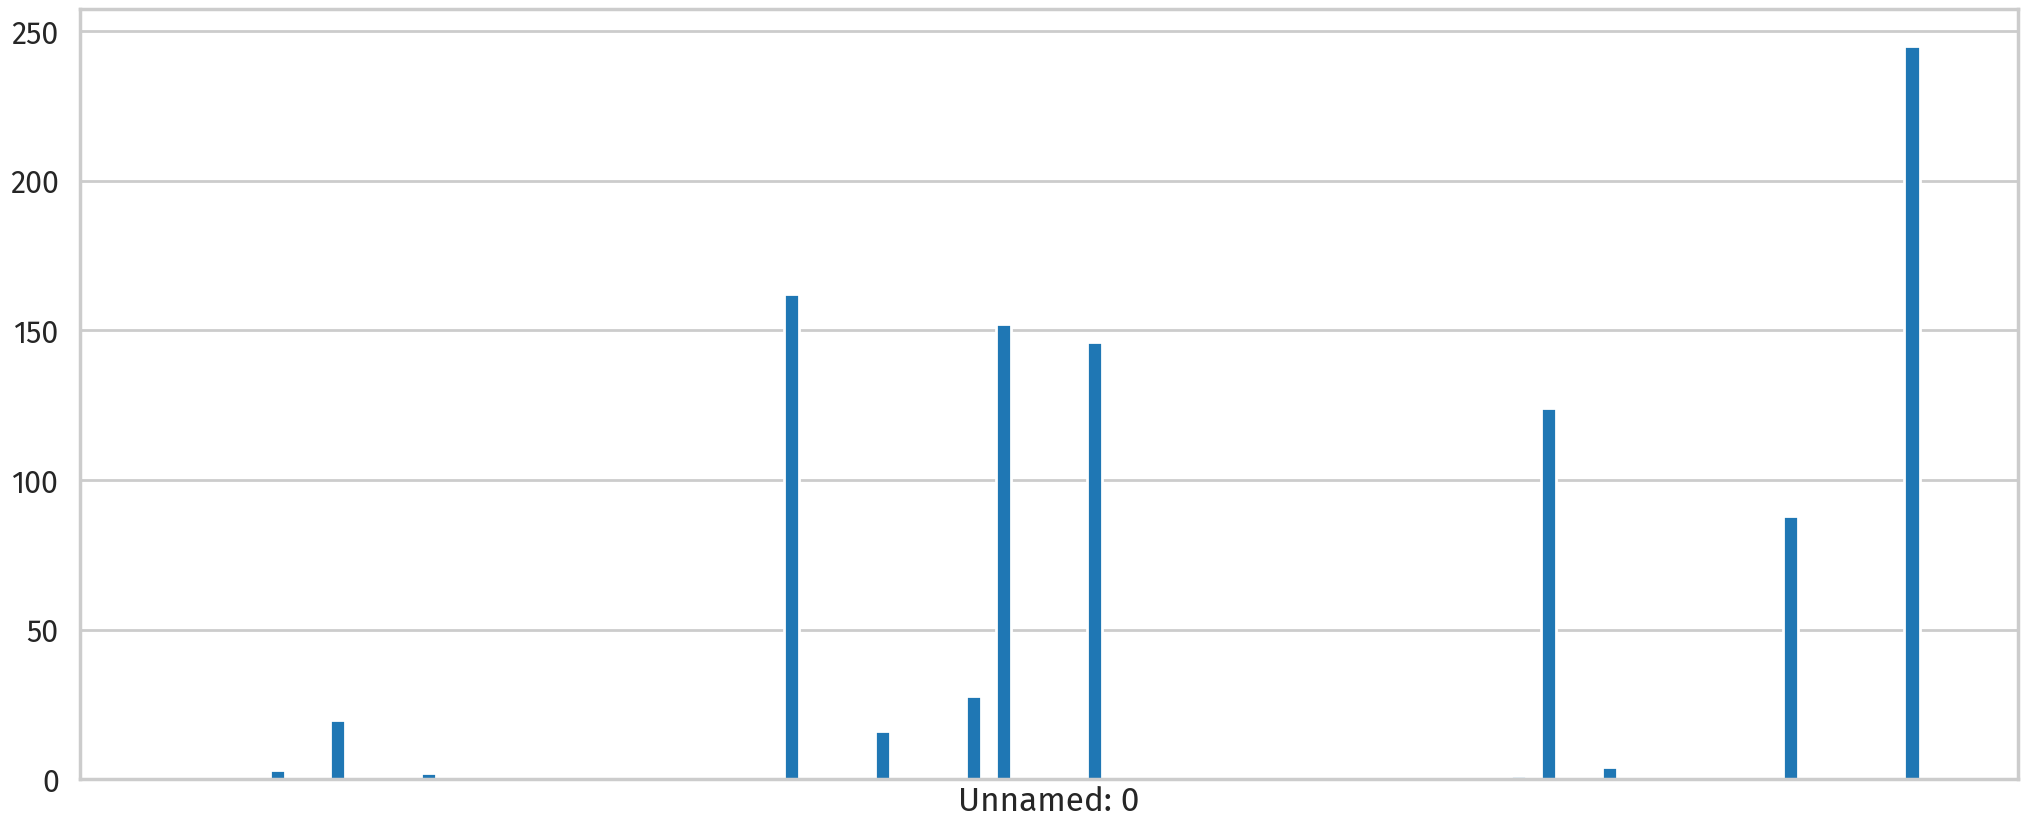

In [15]:
user_stats["commit"].plot(kind="bar", figsize=(25,10))
plt.xticks([]) # anonymized - comment to see usernames

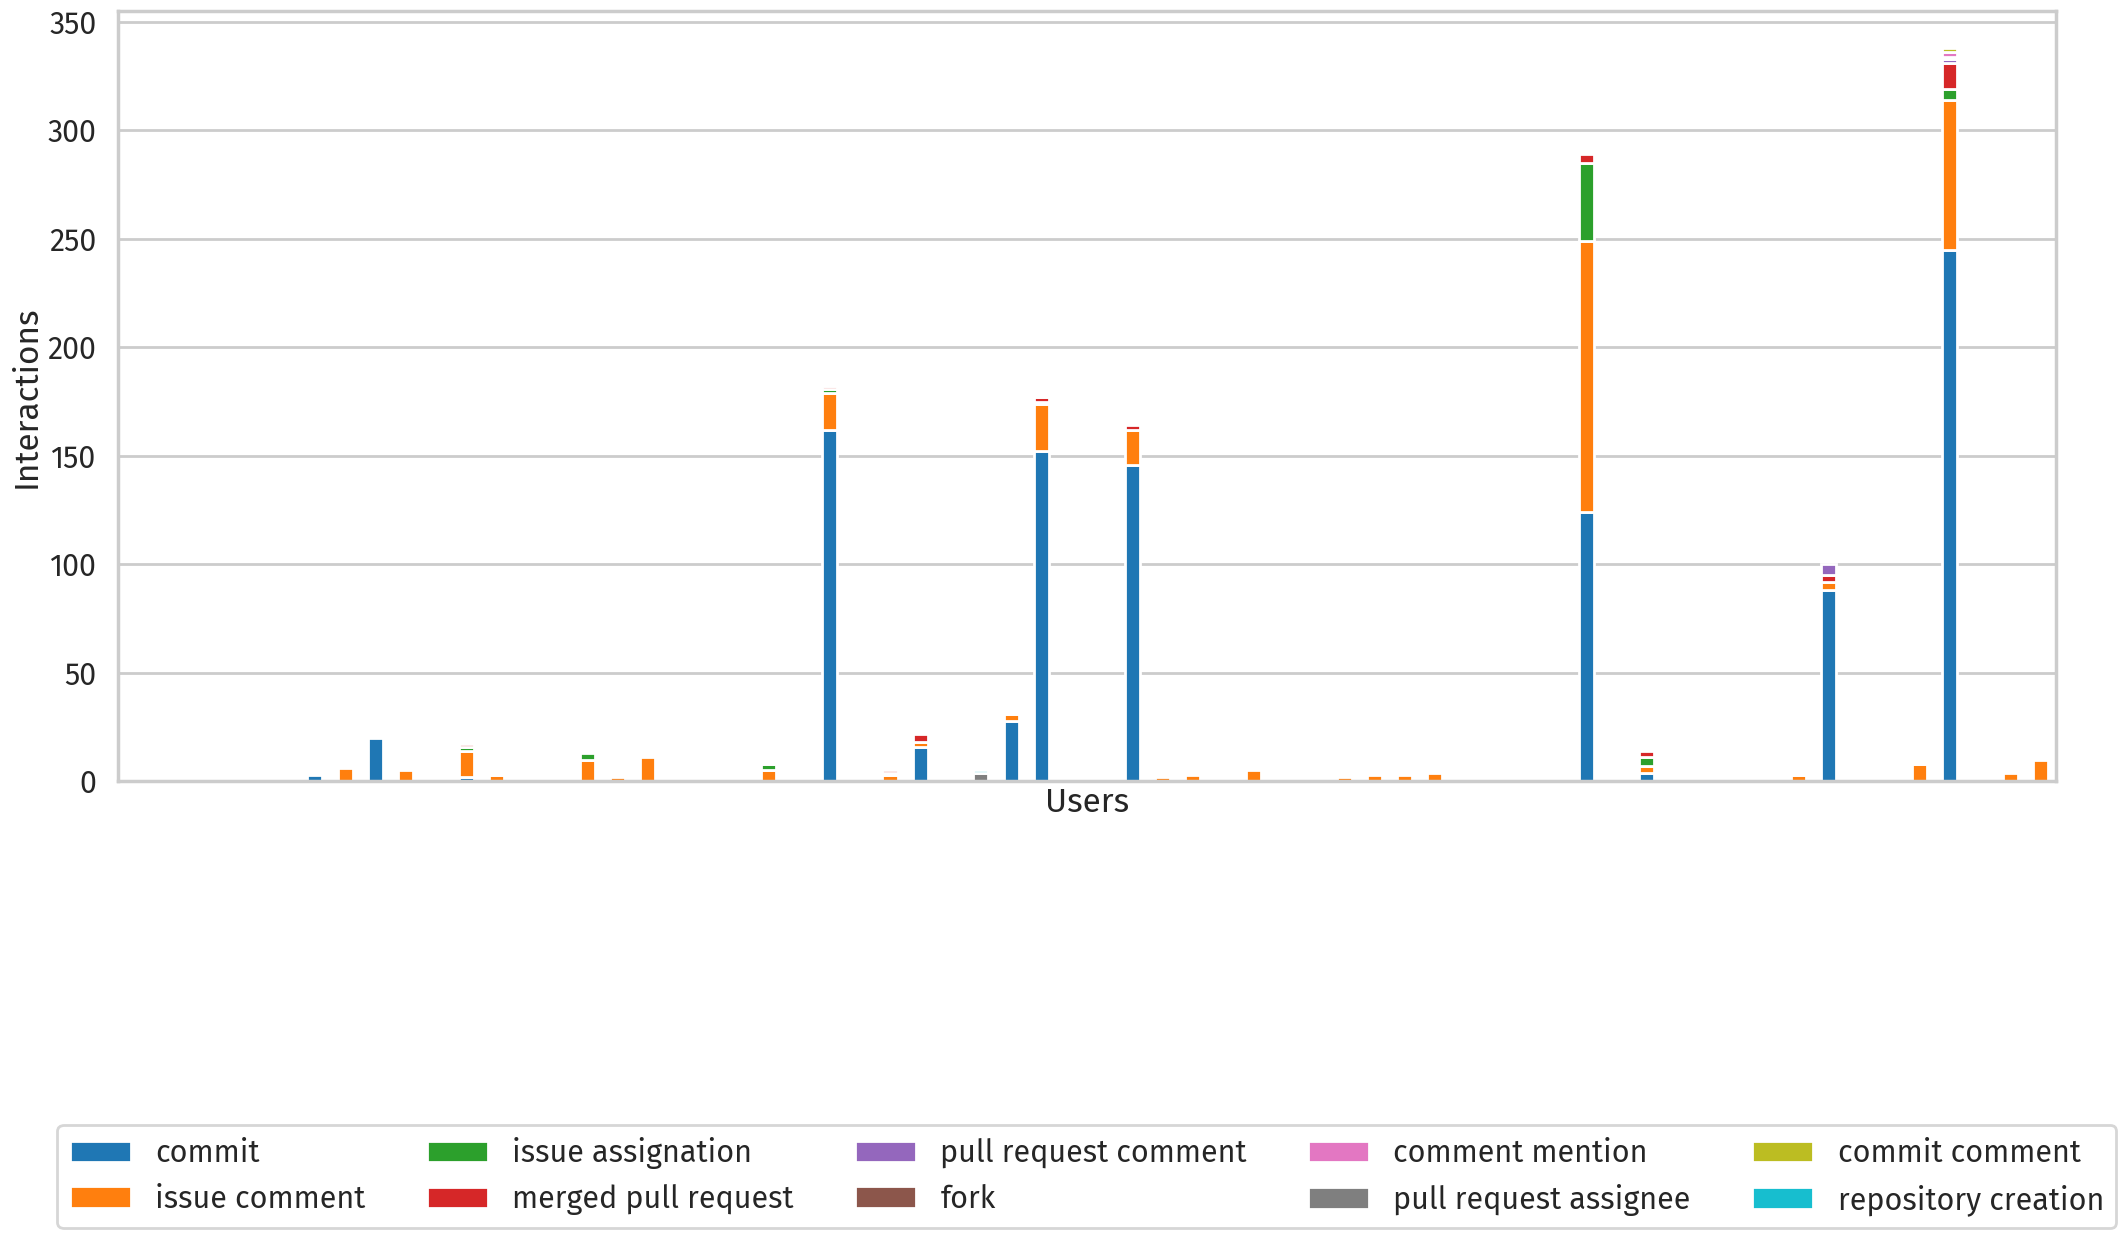

In [16]:
plot = user_stats.plot(kind="bar", figsize=(25,10), stacked=True)
plot.set_xlabel("Users")
plot.set_ylabel("Interactions")
plt.xticks([]) # anonymized - comment to see usernames
plot.legend(bbox_to_anchor =(0.5,-0.6), loc='lower center', ncol=5)
matplotlib.pyplot.savefig("png/github_interactions_stacked.png", dpi=300, bbox_inches="tight")
matplotlib.pyplot.savefig("svg/github_interactions_stacked.svg", bbox_inches="tight")

In [17]:
user_stats['total'] = user_stats[list(user_stats.columns)].sum(axis=1)

In [18]:
user_stats['total'].sort_values().tail(10)

Unnamed: 0
Lyla-Fischer        17.0
Laura Paredes       20.0
dependabot[bot]     22.0
fbaiodias           33.0
tuengominh         100.0
hiromipaw          164.0
fibasile           178.0
ceritium           183.0
openp2pdesign      289.0
viktorsmari        338.0
Name: total, dtype: float64

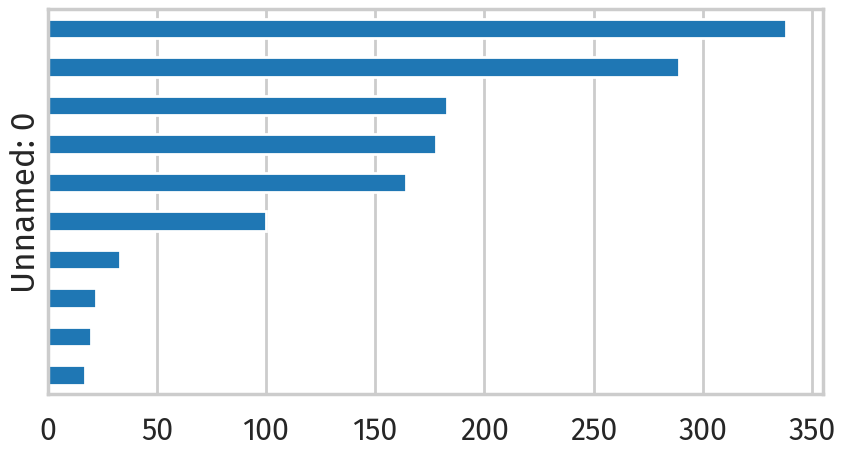

In [19]:
user_stats['total'].sort_values().tail(10).plot(kind="barh", figsize=(10,5))
plt.yticks([]) # anonymized - comment to see usernames
matplotlib.pyplot.savefig("png/github_all_interactions_total.png", dpi=300, bbox_inches="tight")
matplotlib.pyplot.savefig("svg/github_all_interactions_total.svg", bbox_inches="tight")

In [20]:
# user_stats['total'].sort_values().tail(20).index.to_list()
# uncomment to see users

In [21]:
ud = user_stats.loc["openp2pdesign"].astype(int)

In [22]:
ud

commit                   124
issue comment            125
issue assignation         36
merged pull request        4
pull request comment       0
fork                       0
comment mention            0
pull request assignee      0
commit comment             0
repository creation        0
total                    289
Name: openp2pdesign, dtype: int64

In [23]:
g4 = pd.concat([g3, ud], axis=1)
g4.rename(columns={0:'Second-person Perspective', 'openp2pdesign': 'First-person Perspective'}, inplace=True)
g4

,Second-person Perspective,First-person Perspective
commit,1165,124
issue comment,426,125
issue assignation,64,36
merged pull request,44,4
pull request comment,10,0
fork,24,0
comment mention,3,0
pull request assignee,5,0
commit comment,2,0
repository creation,1,0


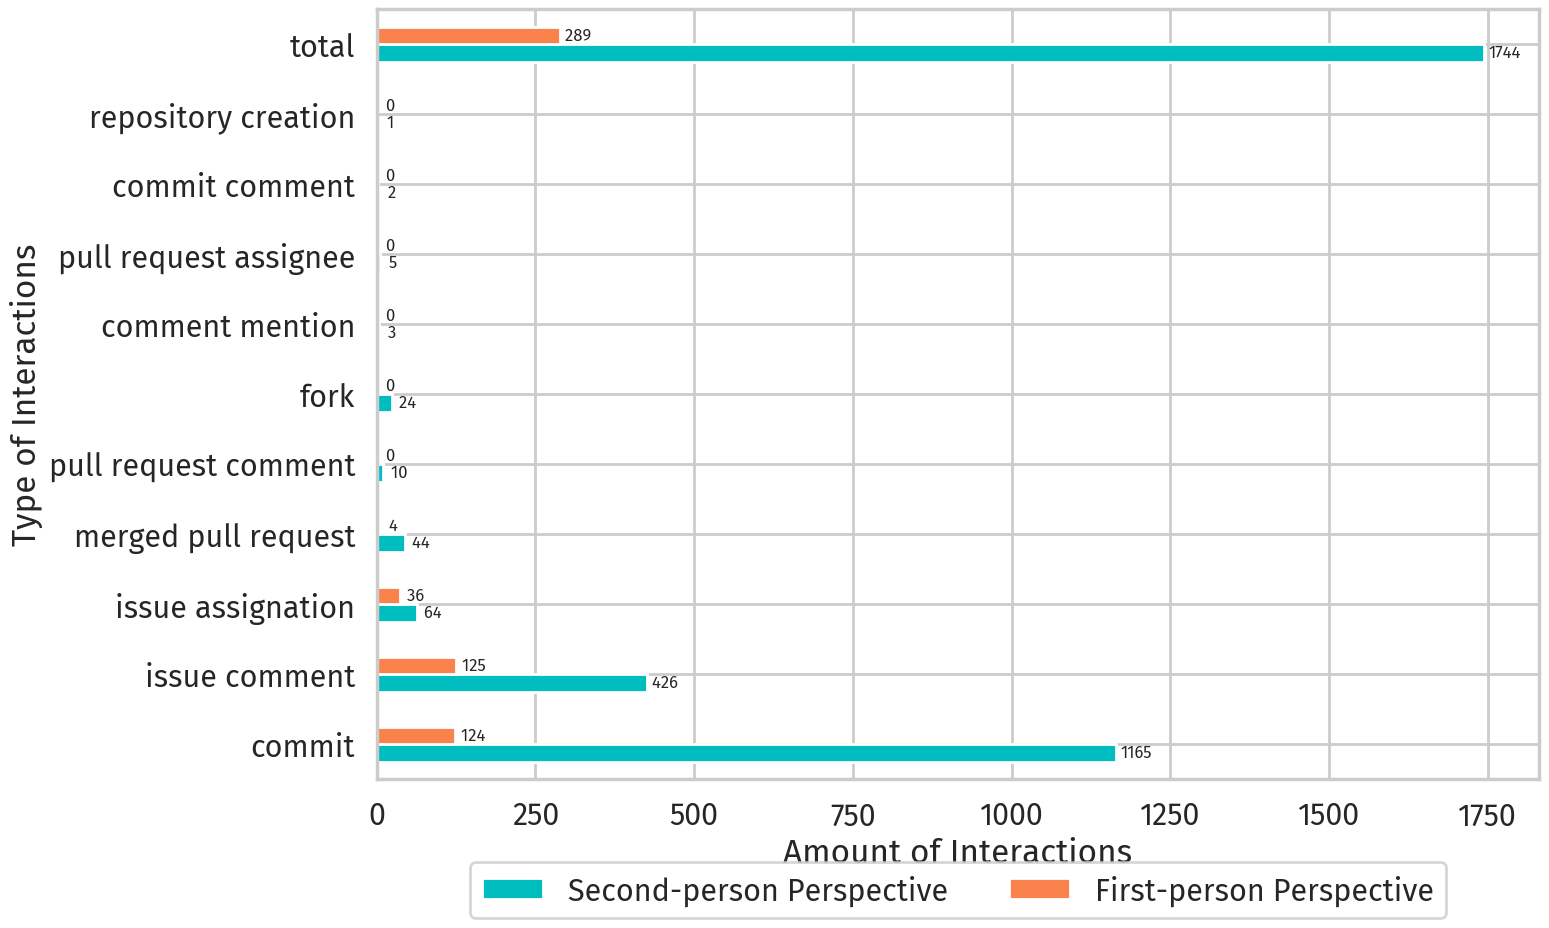

In [24]:
plot = g4.plot(kind="barh", figsize=(15,10), color=[second_person_color,first_person_color])
plot.set_ylabel("Type of Interactions")
plot.set_xlabel("Amount of Interactions")

plot.grid('on', which='major', axis='x')
plot.grid('on', which='major', axis='y')

for p in plot.patches:
    plot.annotate('{:4}'.format(str(p.get_width())), (p.get_x()+p.get_width()+32, p.get_y() + p.get_height()/2.), ha='center', va='center', fontsize=12)

plot.legend(bbox_to_anchor =(0.5,-0.2), loc='lower center', ncol=5)
matplotlib.pyplot.savefig("png/github_all_interactions_1st2ndperson.png", dpi=300, bbox_inches="tight")
matplotlib.pyplot.savefig("svg/github_all_interactions_1st2ndperson.svg", bbox_inches="tight")

In [25]:
time_data.rename(columns={"Unnamed: 0":''}, inplace=True)

In [26]:
time_data.head()

,,commit,issue comment,issue assignation,merged pull request,pull request comment,fork,comment mention,pull request assignee,commit comment,repository creation
0,2021-09-02 11:31:01,0,1,0,0,0,0,0,0,0,0
1,2021-09-02 12:05:16,0,1,0,0,0,0,0,0,0,0
2,2021-03-02 15:38:12,0,1,0,0,0,0,0,0,0,0
3,2021-03-02 16:05:19,0,1,0,0,0,0,0,0,0,0
4,2021-03-02 17:52:37,0,1,0,0,0,0,0,0,0,0


In [27]:
time_data = time_data.set_index("")

In [28]:
time_data.index = pd.to_datetime(time_data.index)

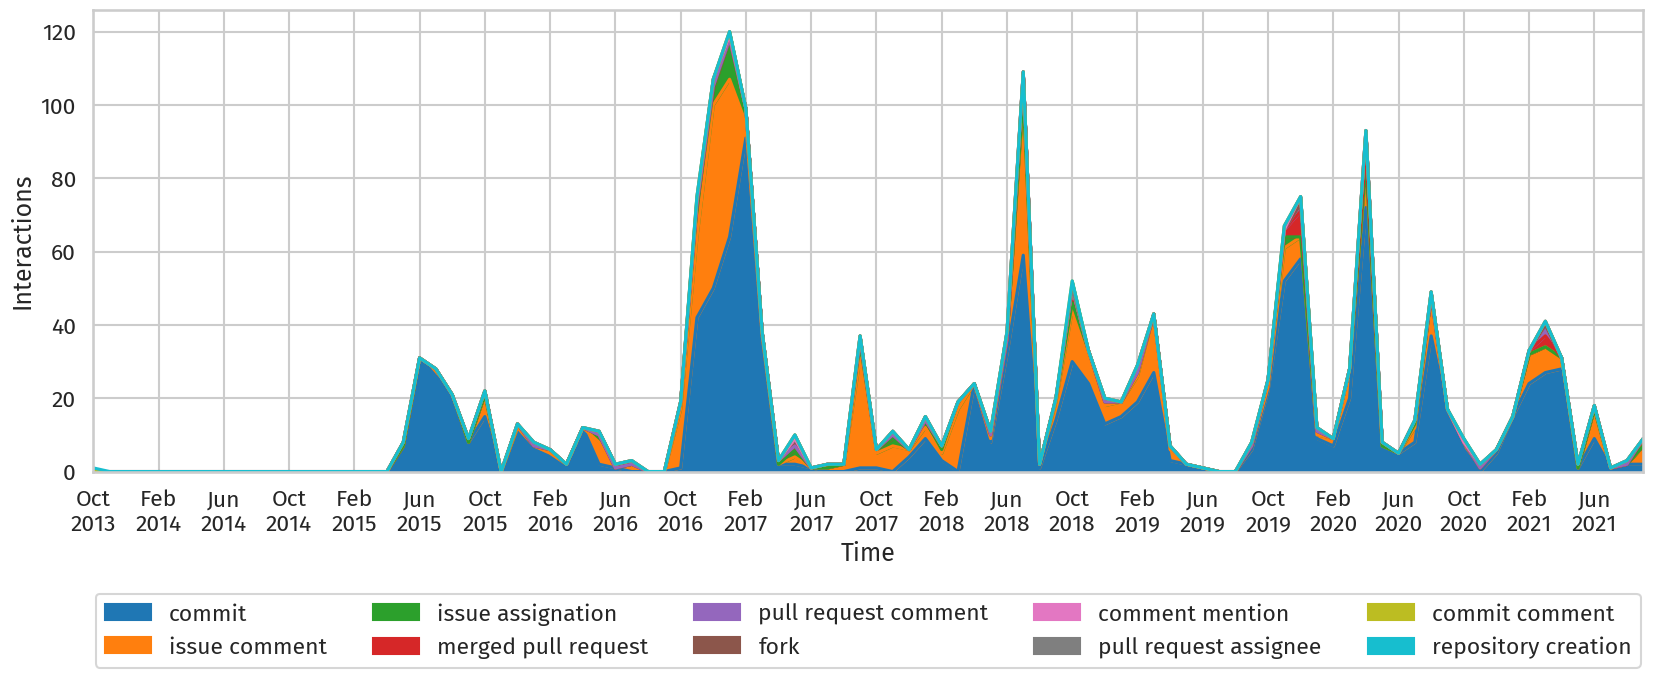

In [29]:
# Plot interactions over time, by type (monthly resample)
seaborn.set_context("talk")
plot = time_data.resample('ME').sum().plot(kind="area", figsize=(20,6))
# Axes
plot.set_xlabel("Time")
plot.set_ylabel("Interactions")
# Time format for x axis
xticks = pd.date_range(start=time_data.index.min(), end=time_data.index.max(), freq='4ME')
plot.set_xticks(xticks)
plot.set_xticklabels([x.strftime('%h\n%Y') for x in xticks]);
plot.grid('on', which='major', axis='x')
plot.grid('on', which='major', axis='y')
plot.legend(bbox_to_anchor =(0.5,-0.45), loc='lower center', ncol=5)
matplotlib.pyplot.savefig("png/github_all_interactions_over_time.png", dpi=300, bbox_inches="tight")
matplotlib.pyplot.savefig("svg/github_all_interactions_over_time.svg", bbox_inches="tight")

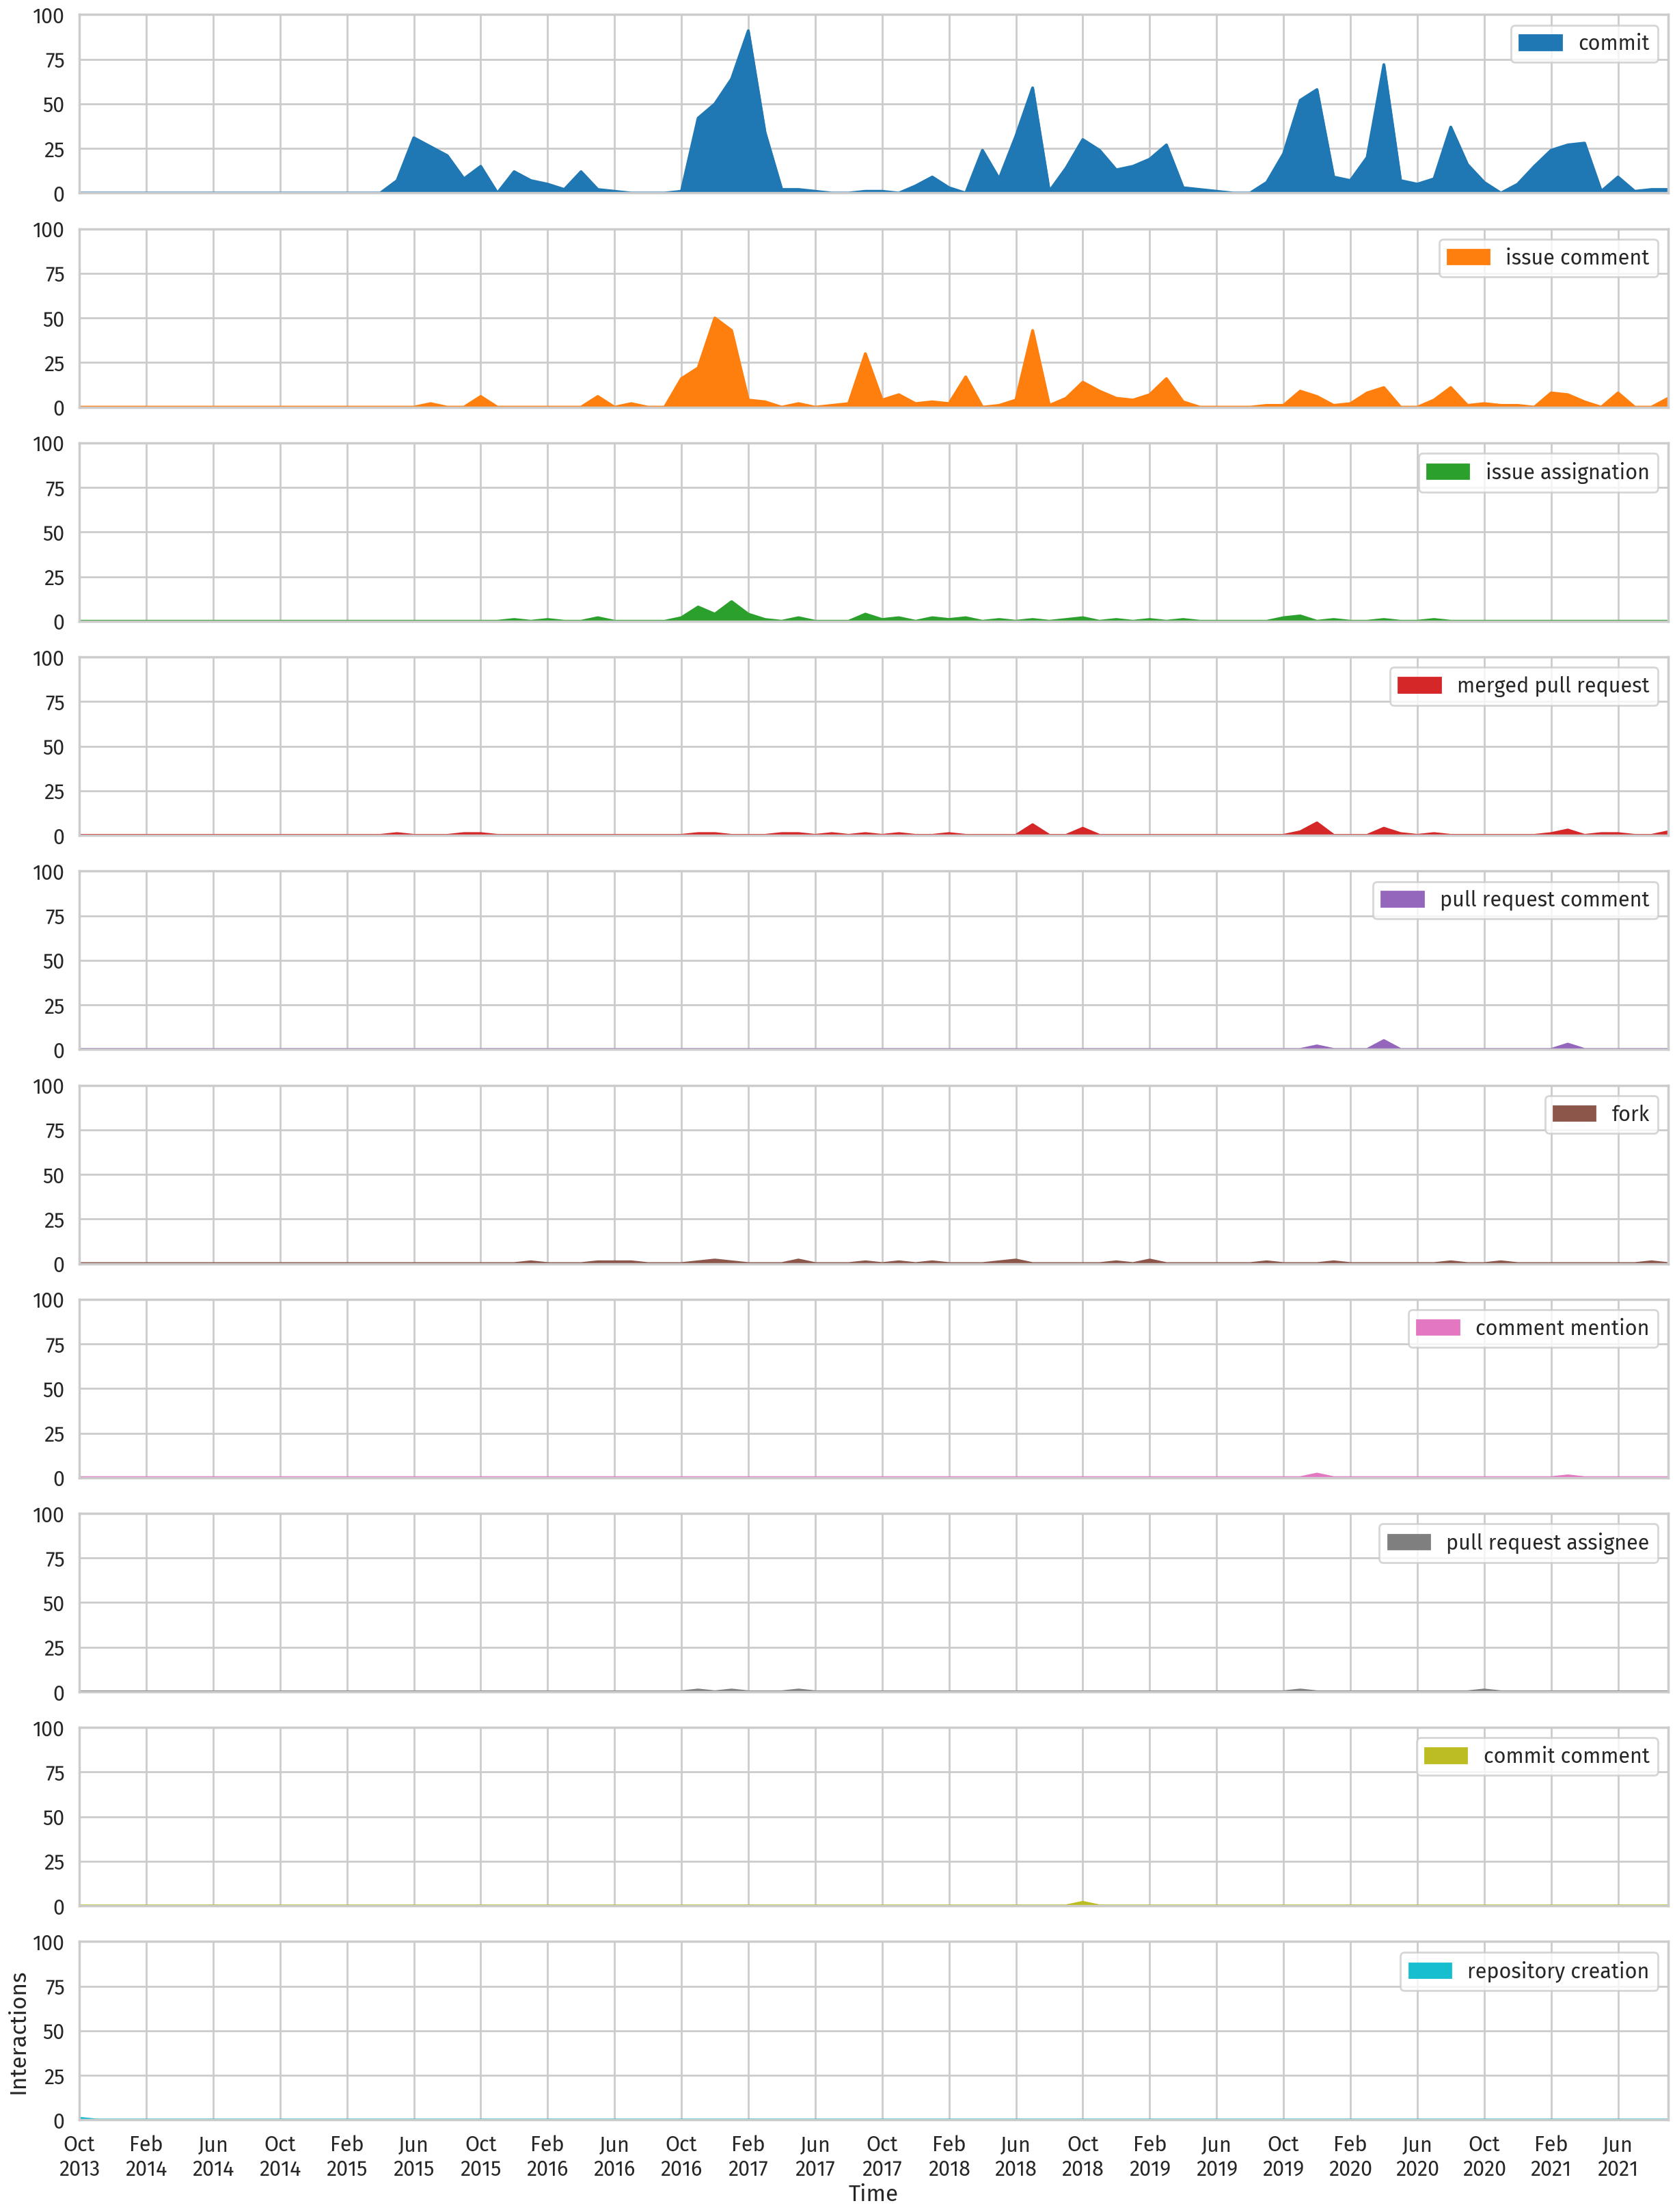

In [30]:
# Plot interactions over time, split by type (monthly resample)
seaborn.set_context("poster")
plot = time_data.resample('ME').sum().plot(label=("X", "Y"), subplots=True, legend=True, kind="area", sharex=True, sharey=True, ylim=(0, 150), figsize=(30,40))

ax = plot.flatten()
# Time format for x axis

for i in plot:
    xticks = pd.date_range(start=time_data.index.min(), end=time_data.index.max(), freq='4ME')
    ax[0].set_xticks(xticks)
    ax[0].set_xticklabels([x.strftime('%h\n%Y') for x in xticks]);
    ax[0].grid('on', which='major', axis='x')
    ax[0].grid('on', which='major', axis='y')
    i.set_ylim(0,100)

matplotlib.pyplot.xlabel("Time")
matplotlib.pyplot.ylabel("Interactions")
matplotlib.pyplot.savefig("png/github_all_interactions_over_time_separated.png", dpi=300, bbox_inches="tight")
matplotlib.pyplot.savefig("svg/github_all_interactions_over_time_separated.svg", bbox_inches="tight")

In [31]:
# Combine all the interactions together
time_data_combined = sna.time_analysis(data=data, focus="global", interaction="0", structure="combined")

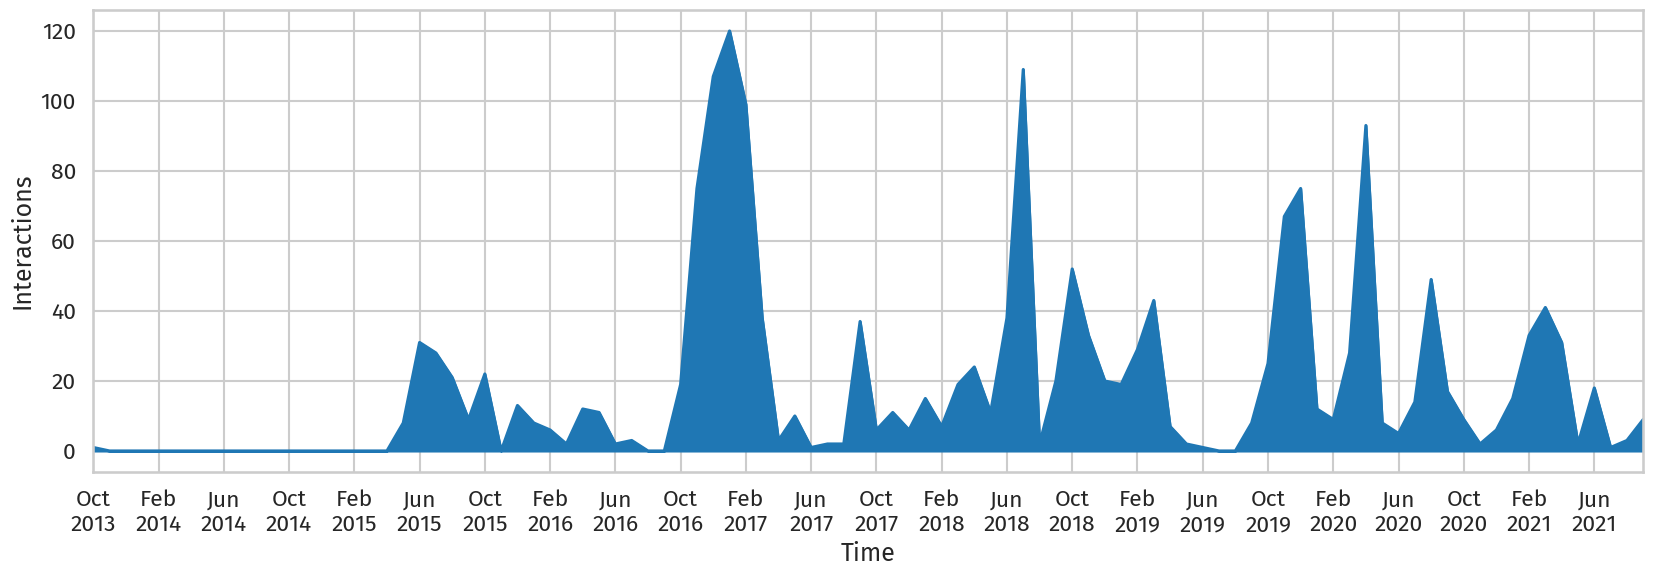

In [32]:
# Plot interactions over time (monthly resample)
seaborn.set_context("talk")
plot = time_data_combined.resample('ME').sum().plot(kind="area", figsize=(20,6))
# Axes
plot.set_xlabel("Time")
plot.set_ylabel("Interactions")
# Time format for x axis
xticks = pd.date_range(start=time_data.index.min(), end=time_data.index.max(), freq='4ME')
plot.set_xticks(xticks)
plot.set_xticklabels([x.strftime('%h\n%Y') for x in xticks]);
plot.grid('on', which='major', axis='x')
plot.grid('on', which='major', axis='y')
matplotlib.pyplot.savefig("png/github_all_interactions_over_time_total.png", dpi=300, bbox_inches="tight")
matplotlib.pyplot.savefig("svg/github_all_interactions_over_time_total.svg", bbox_inches="tight")

## Single users - Data visualisation

In [33]:
# Get data of single users
user_data = sna.time_analysis(data=data, focus="user", interaction="0", structure="separated")

In [34]:
user_data.head()

commit  issue comment  issue assignation  \
users       time                                                            
viktorsmari 2021-09-02 11:31:01       0              1                  0   
            2021-09-02 12:05:16       0              1                  0   
            2021-03-02 15:38:12       0              1                  0   
            2021-03-02 16:05:19       0              1                  0   
            2021-03-02 17:52:37       0              1                  0   

                                 merged pull request  pull request comment  \
users       time                                                             
viktorsmari 2021-09-02 11:31:01                    0                     0   
            2021-09-02 12:05:16                    0                     0   
            2021-03-02 15:38:12                    0                     0   
            2021-03-02 16:05:19                    0                     0   
            2021-03-02 17:52:37                    0                     0   

                                 fork  comment mention  pull request assignee  \
users       time                                                                
viktorsmari 2021-09-02 11:31:01     0                0                      0   
            2021-09-02 12:05:16     0                0                      0   
            2021-03-02 15:38:12     0                0                      0   
            2021-03-02 16:05:19     0                0                      0   
            2021-03-02 17:52:37     0                0                      0   

                                 commit comment  repository creation  
users       time                                                      
viktorsmari 2021-09-02 11:31:01               0                    0  
            2021-09-02 12:05:16               0                    0  
            2021-03-02 15:38:12               0                    0  
            2021-03-02 16:05:19               0                    0  
            2021-03-02 17:52:37               0                    0

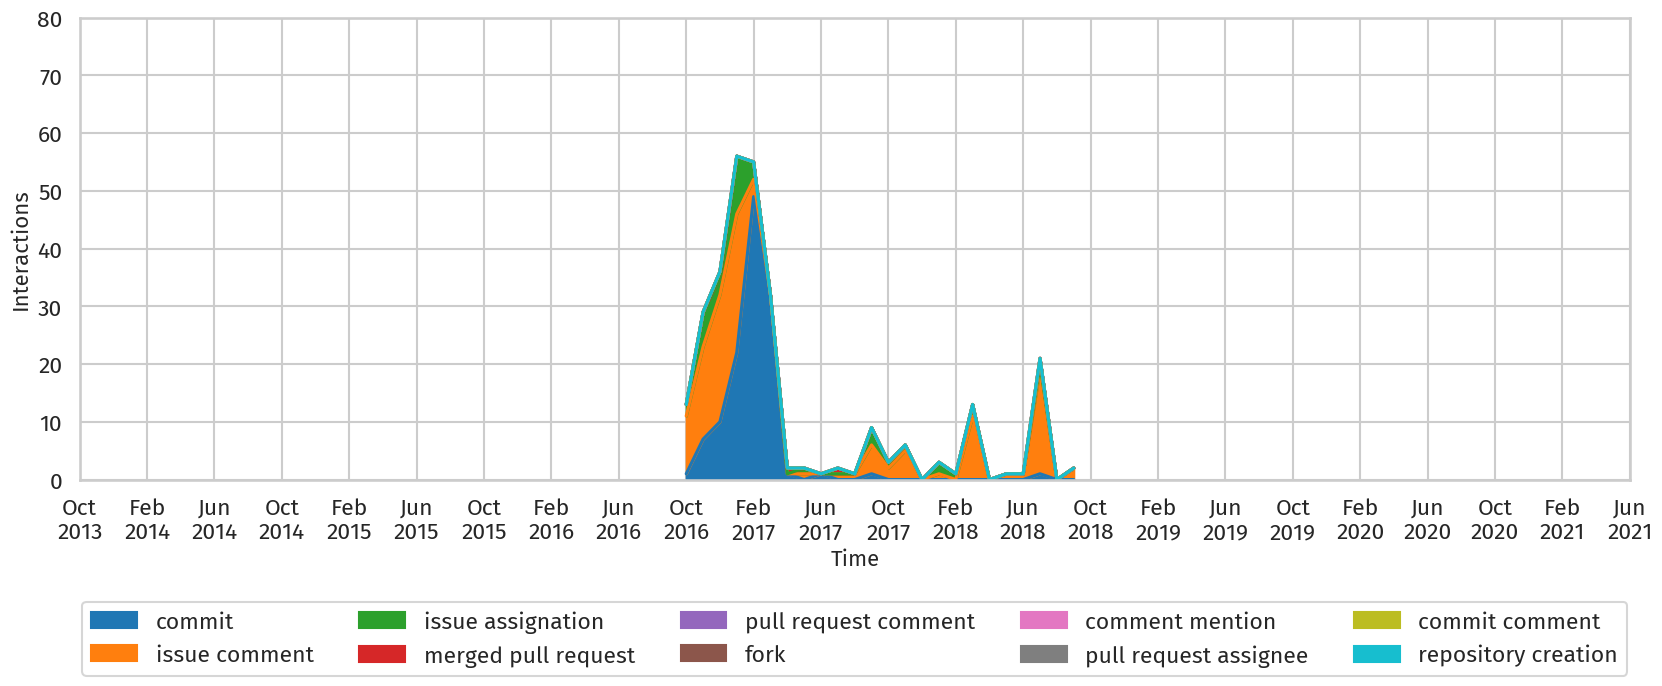

In [35]:
# Plot interactions of @openp2pdesign user over time, by type (monthly resample)
plot = user_data.loc["openp2pdesign"].resample('ME').sum().plot(kind="area", ylim=(0,80), figsize=(20,6))

xticks = pd.date_range(start=time_data.index.min(), end=time_data.index.max(), freq='4ME')
plot.set_xticks(xticks)
plot.set_xticklabels([x.strftime('%h\n%Y') for x in xticks]);
plot.grid('on', which='major', axis='x')
plot.grid('on', which='major', axis='y')
plot.legend(bbox_to_anchor =(0.5,-0.45), loc='lower center', ncol=5)
plt.xlabel("Time", fontsize=16)
plt.ylabel("Interactions", fontsize=16)
matplotlib.pyplot.savefig("png/github_openp2pdesign_interactions.png", dpi=300, bbox_inches="tight")
matplotlib.pyplot.savefig("svg/github_openp2pdesign_interactions.svg", bbox_inches="tight")

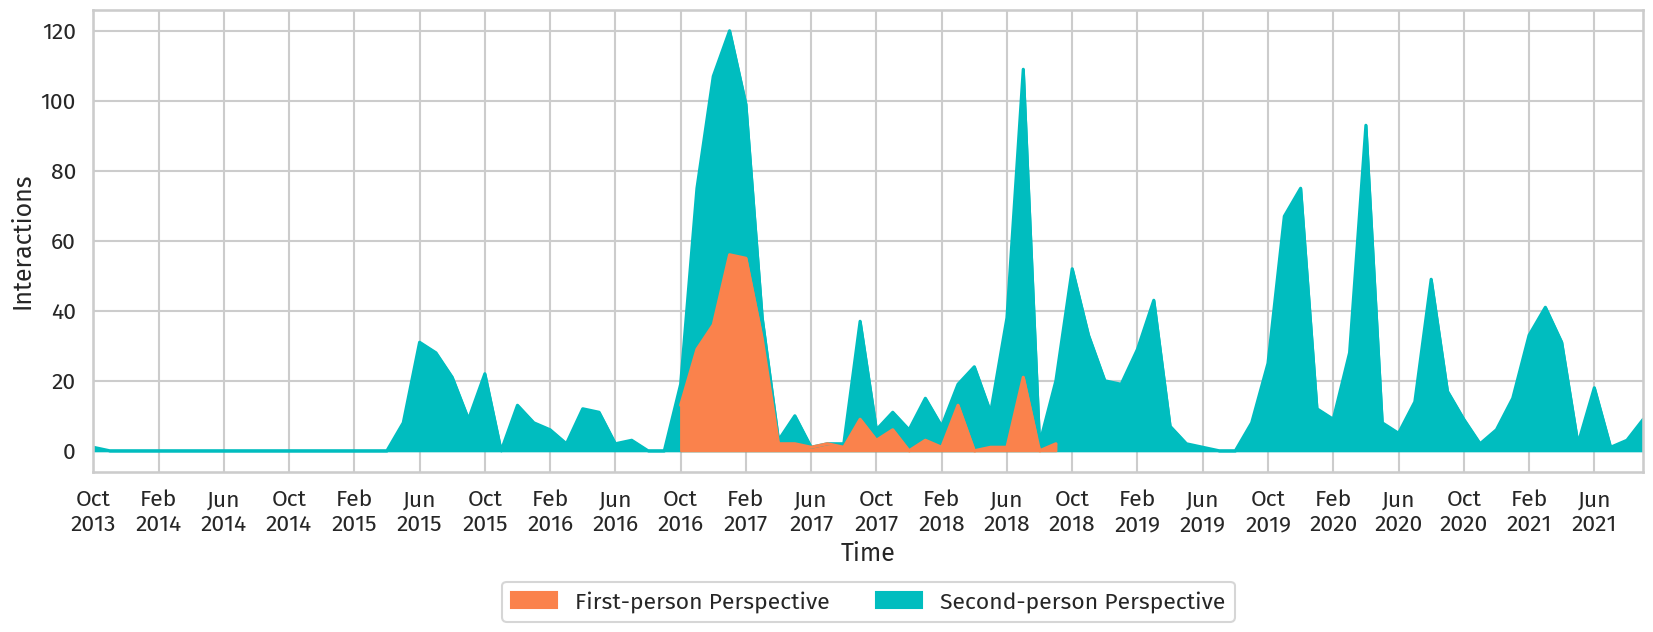

In [36]:
# Plot interactions over time (monthly resample)
plot = time_data_combined.resample('ME').sum().plot(kind="area", figsize=(20,6), color=second_person_color)
plot2 = user_data.loc["openp2pdesign"].sum(axis=1).resample('ME').sum().plot(kind="area", color=first_person_color, ax=plot)
# Axes
plot.set_xlabel("Time")
plot.set_ylabel("Interactions")
# Time format for x axis
xticks = pd.date_range(start=time_data.index.min(), end=time_data.index.max(), freq='4ME')
plot.set_xticks(xticks)
plot.set_xticklabels([x.strftime('%h\n%Y') for x in xticks]);
plot.grid('on', which='major', axis='x')
plot.grid('on', which='major', axis='y')
# Legend
red_patch = matplotlib.patches.Patch(color=first_person_color, label='First-person Perspective')
blue_patch = matplotlib.patches.Patch(color=second_person_color, label='Second-person Perspective')
plot.legend(handles=[red_patch, blue_patch], bbox_to_anchor =(0.5,-0.35), loc='lower center', ncol=2)
matplotlib.pyplot.savefig("png/github_interactions_1st2ndperson.png", dpi=300, bbox_inches="tight")
matplotlib.pyplot.savefig("svg/github_interactions_1st2ndperson.svg", bbox_inches="tight")

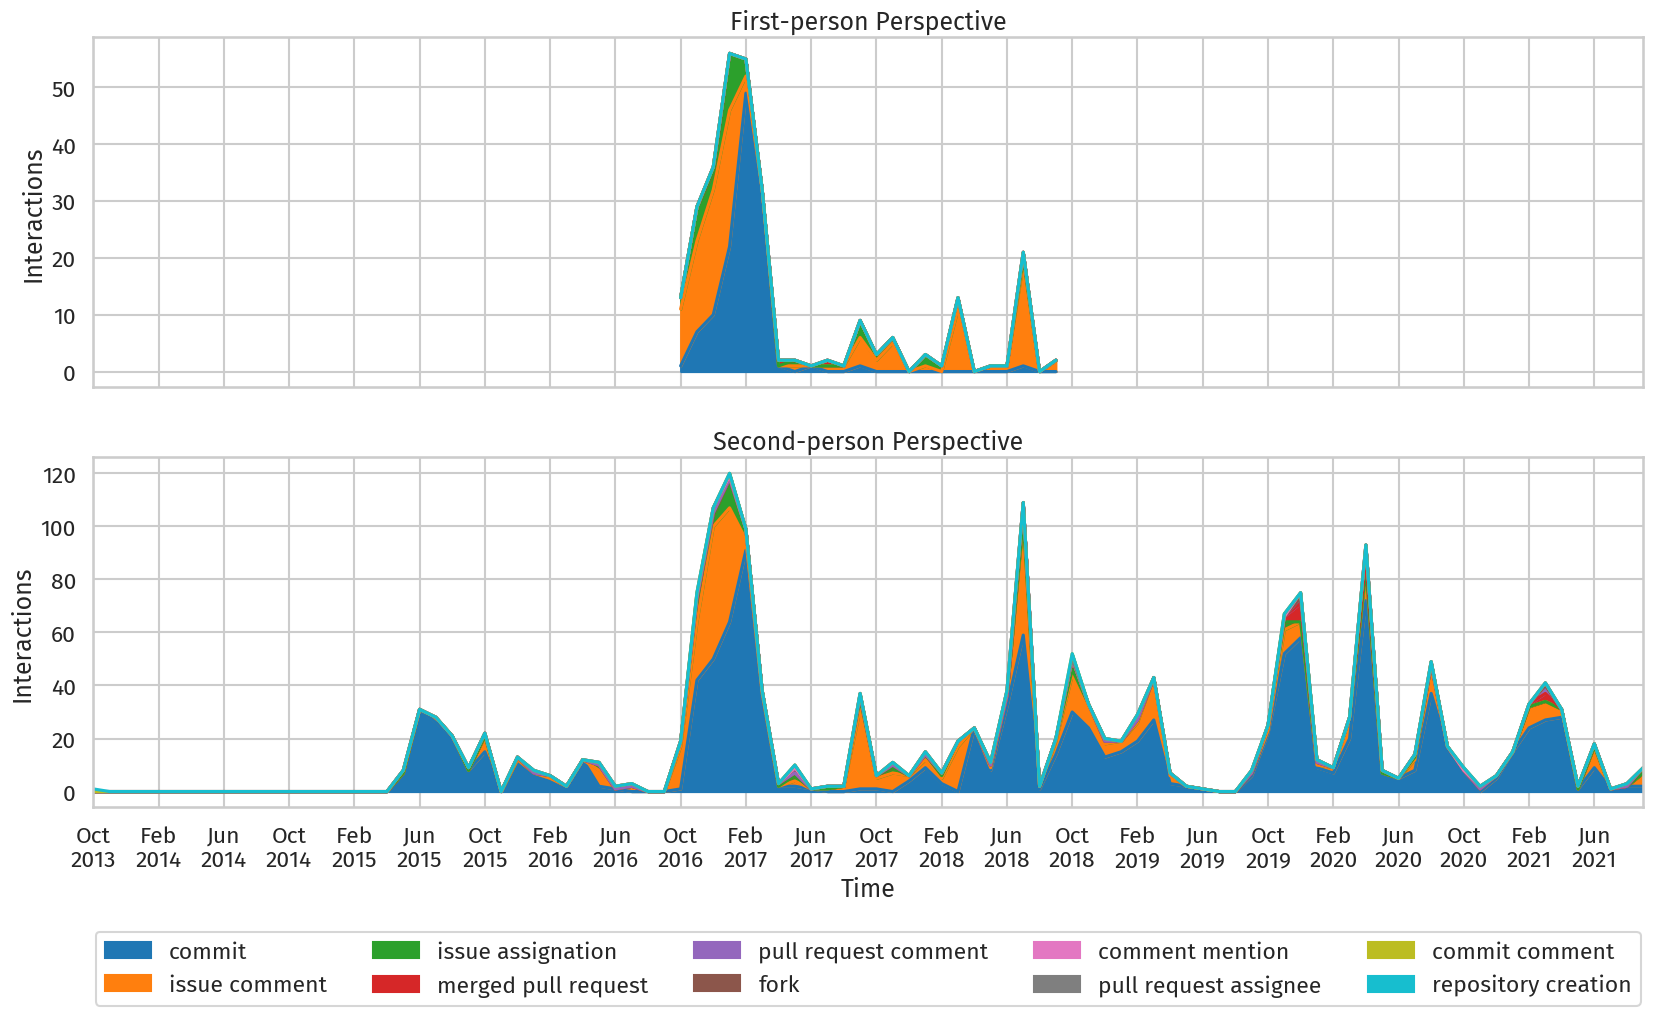

In [37]:
fig=plt.figure()
ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex = ax1)

# Plot interactions over time, by type (monthly resample)
plot = user_data.loc["openp2pdesign"].resample('ME').sum().plot(kind="area", figsize=(20,10), ax=ax1)
time_data.resample('ME').sum().plot(kind="area", ax=ax2)
# Axes
ax1.set_title("First-person Perspective")
ax2.set_title("Second-person Perspective")
ax2.set_xlabel("Time")
ax1.set_ylabel("Interactions")
ax2.set_ylabel("Interactions")
# Time format for x axis
xticks = pd.date_range(start=time_data.index.min(), end=time_data.index.max(), freq='4ME')
ax1.set_xticks(xticks)
ax1.set_xticklabels([x.strftime('%h\n%Y') for x in xticks]);
ax1.grid('on', which='major', axis='x')
ax2.grid('on', which='major', axis='y')
ax1.get_legend().remove()
ax2.legend(bbox_to_anchor =(0.5,-0.6), loc='lower center', ncol=5)
matplotlib.pyplot.savefig("png/github_openp2pdesign_interactions_1st2ndperson.png", dpi=300, bbox_inches="tight")
matplotlib.pyplot.savefig("svg/github_openp2pdesign_interactions_1st2ndperson.svg", bbox_inches="tight")